In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import zipline
from zipline.data import bundles
from zipline.utils.run_algo import load_extensions
import os
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)
from zipline.data.bundles import register, unregister
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.utils.calendar_utils import register_calendar, get_calendar
from zipline.finance import commission, slippage


from zipline.api import (order, 
                         record, 
                         symbol,
                         get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm
from zipline.api import order_target, record, symbol
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio as pf
import seaborn as sns
# from talib import EMA
%load_ext zipline
%load_ext autoreload
%autoreload 2

In [2]:
stocks = ["BTC"]
def initialize(context):
    context.has_ordered = False
    context.stocks = stocks
    
def handle_data(context, data):
    if not context.has_ordered:
        for stock in stocks:
            order(symbol(stock), 100)
        context.has_ordered = True

In [3]:
start_date = '2021-08-20'
end_date = '2022-08-20'

In [4]:
!zipline run --bundle cryptocompare_daily -f buy_and_hold.ipynb -s {start_date} -e {end_date} -o bnh.pickle --no-benchmark

/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
Traceback (most recent call last):
  File "/home/shell007/anaconda

In [7]:
!zipline run --bundle cryptocompare_daily -f buy_and_hold.py -s 2021-08-20 -e 2022-08-20 -o bnh.pickle --no-benchmark

/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
[2023-04-05 06:54:40.197704] INFO: zipline.finance.metrics.tracker

In [8]:
res = pd.read_pickle('bnh.pickle')

In [9]:
res.head()

,period_open,period_close,positions,gross_leverage,starting_exposure,net_leverage,returns,ending_exposure,starting_value,ending_value,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility
2021-08-20 00:00:00+00:00,2021-08-20 13:31:00+00:00,2021-08-20 20:00:00+00:00,[],0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,0.000000,0.000000,0.0,0.0,1,2021-08,NaN,0.0,NaN
2021-08-23 00:00:00+00:00,2021-08-23 13:31:00+00:00,2021-08-23 20:00:00+00:00,"[{'sid': Equity(3 [BTC]), 'amount': 10000, 'co...",50.535193,0.0,50.535193,-0.024646,492897100.0,0.0,492897100.0,...,-11.224972,-0.024646,50.535193,0.0,0.0,2,2021-08,0.276649,0.0,0.0
2021-08-24 00:00:00+00:00,2021-08-24 13:31:00+00:00,2021-08-24 20:00:00+00:00,"[{'sid': Equity(3 [BTC]), 'amount': 10000, 'co...",41.038278,492897100.0,41.038278,0.237196,495210600.0,492897100.0,495210600.0,...,79.041823,-0.024646,50.535193,0.0,0.0,3,2021-08,2.295229,0.0,0.0
2021-08-25 00:00:00+00:00,2021-08-25 13:31:00+00:00,2021-08-25 20:00:00+00:00,"[{'sid': Equity(3 [BTC]), 'amount': 10000, 'co...",-76.449708,495210600.0,-76.449708,-1.516958,476905400.0,495210600.0,476905400.0,...,-6.824218,-1.516958,50.535193,0.0,0.0,4,2021-08,12.741413,0.0,0.0
2021-08-26 00:00:00+00:00,2021-08-26 13:31:00+00:00,2021-08-26 20:00:00+00:00,"[{'sid': Equity(3 [BTC]), 'amount': 10000, 'co...",71.833425,476905400.0,71.833425,-2.093406,489964400.0,476905400.0,489964400.0,...,-9.330240,-1.516958,71.833425,0.0,0.0,5,2021-08,16.708538,0.0,0.0


<AxesSubplot:>

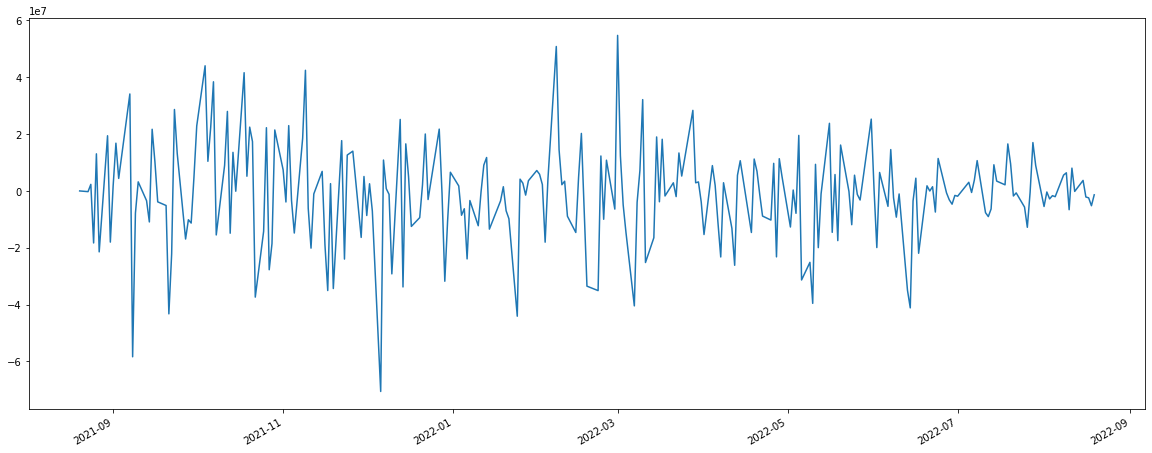

In [10]:
res.pnl.plot(figsize = (20,8))